In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
df.drop(['PassengerId','Name','Cabin','Ticket','Embarked'],axis=1,inplace=True)

In [8]:
df['Sex'] = df['Sex'].replace(to_replace = {'female' : 0, 'male' : 1})

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
df['Age']=df['Age'].fillna(value=df['Age'].median())

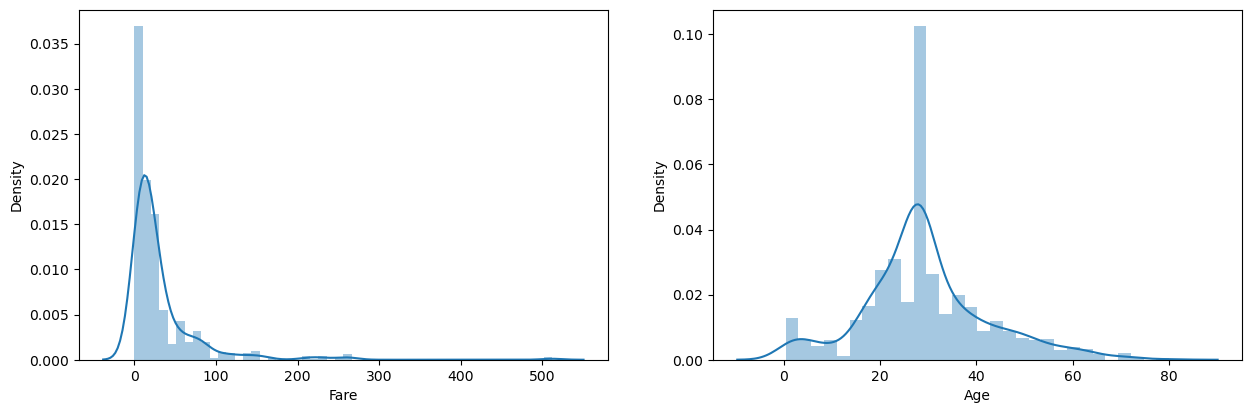

In [11]:
plt.figure(figsize=(15,10))
for idx, col in enumerate(['Fare','Age']):
    plt.subplot(2,2,idx+1)
    sns.distplot(df[col])

<AxesSubplot:>

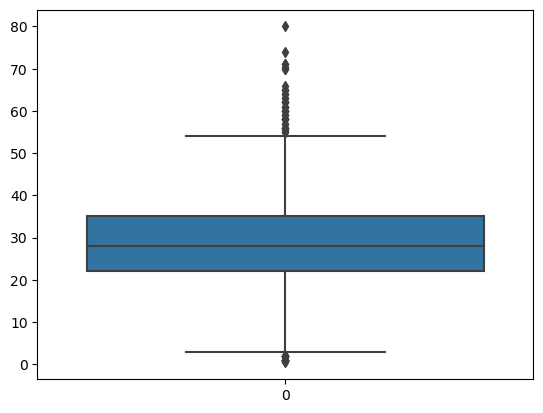

In [12]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

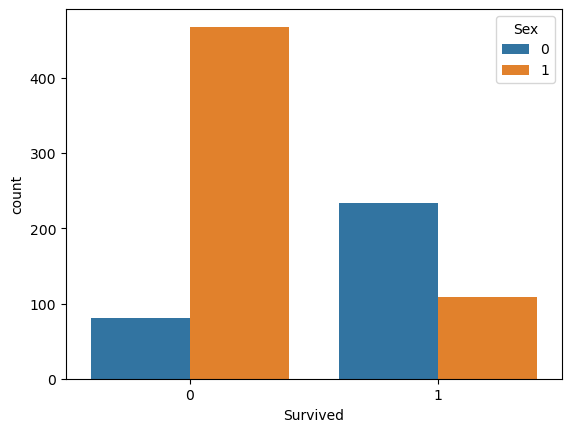

In [13]:

sns.countplot(x='Survived',hue='Sex',data=df)

In [14]:
df.isnull().sum()/len(df)*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
dtype: float64

In [15]:
df['Age'].max()

80.0

In [16]:
df['Age'].min()

0.42

In [17]:
# IQR
Q1 = np.percentile(df['Age'], 25, method='midpoint')
Q3 = np.percentile(df['Age'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)


13.0


In [18]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['Age']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['Age']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 54.5
42
Lower Bound: 2.5
24


In [19]:
 lower_array = np.array(df['Age']<=lower)

In [20]:
df[df['Age']>=54.5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
11,1,1,0,58.0,0,0,26.5500
15,1,2,0,55.0,0,0,16.0000
33,0,2,1,66.0,0,0,10.5000
54,0,1,1,65.0,0,1,61.9792
94,0,3,1,59.0,0,0,7.2500
96,0,1,1,71.0,0,0,34.6542
116,0,3,1,70.5,0,0,7.7500
152,0,3,1,55.5,0,0,8.0500
170,0,1,1,61.0,0,0,33.5000
174,0,1,1,56.0,0,0,30.6958


In [21]:
df['Age']=np.where(df['Age']>54.5,54.5,df['Age'])

In [22]:
df[df['Age']>=54.5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
11,1,1,0,54.5,0,0,26.5500
15,1,2,0,54.5,0,0,16.0000
33,0,2,1,54.5,0,0,10.5000
54,0,1,1,54.5,0,1,61.9792
94,0,3,1,54.5,0,0,7.2500
96,0,1,1,54.5,0,0,34.6542
116,0,3,1,54.5,0,0,7.7500
152,0,3,1,54.5,0,0,8.0500
170,0,1,1,54.5,0,0,33.5000
174,0,1,1,54.5,0,0,30.6958


In [23]:
df['Age']=np.where(df['Age']<2.5,2.5,df['Age'])

In [24]:
df[df['Age']<=2.5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
7,0,3,1,2.5,3,1,21.0750
16,0,3,1,2.5,4,1,29.1250
78,1,2,1,2.5,0,2,29.0000
119,0,3,0,2.5,4,2,31.2750
164,0,3,1,2.5,4,1,39.6875
172,1,3,0,2.5,1,1,11.1333
183,1,2,1,2.5,2,1,39.0000
205,0,3,0,2.5,0,1,10.4625
297,0,1,0,2.5,1,2,151.5500
305,1,1,1,2.5,1,2,151.5500


<AxesSubplot:>

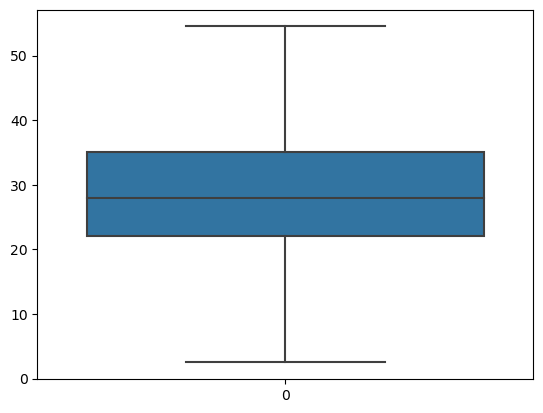

In [25]:
sns.boxplot(df['Age'])

In [26]:
x=df.drop(['Survived'],axis=1)

In [27]:
y= df['Survived']

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

In [29]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [30]:
xtrain

array([[ 0.84174284, -1.37207547, -0.03826113, -0.46836875,  4.71775182,
        -0.24158225],
       [ 0.84174284,  0.72882288, -0.12156975, -0.46836875, -0.4659508 ,
        -0.51470526],
       [ 0.84174284,  0.72882288, -0.12156975, -0.46836875, -0.4659508 ,
        -0.51066648],
       ...,
       [ 0.84174284, -1.37207547, -0.12156975,  0.42328513, -0.4659508 ,
        -0.17948589],
       [ 0.84174284,  0.72882288, -1.70443369,  3.98990065,  2.12590051,
         0.27992619],
       [ 0.84174284,  0.72882288, -0.95465603, -0.46836875, -0.4659508 ,
        -0.50974159]])

In [31]:
xtest

array([[-1.51778828, -1.37207547,  0.79482515,  0.42328513,  0.82997486,
         0.94127765],
       [-0.33802272,  0.72882288, -0.12156975, -0.46836875, -0.4659508 ,
        -0.38723103],
       [ 0.84174284,  0.72882288, -0.70473015, -0.46836875, -0.4659508 ,
        -0.50460829],
       ...,
       [ 0.84174284, -1.37207547, -0.62142152, -0.46836875, -0.4659508 ,
        -0.51016163],
       [ 0.84174284,  0.72882288, -0.12156975, -0.46836875, -0.4659508 ,
        -0.51066648],
       [ 0.84174284, -1.37207547, -0.28818701, -0.46836875, -0.4659508 ,
        -0.50713254]])

# LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)

LogisticRegression()

In [33]:
y_pred = classifier.predict(xtest)

In [34]:
print('Training Score:',100*classifier.score(xtrain,ytrain))
print('Testing Score :',100*classifier.score(xtest,ytest))

Training Score: 80.75842696629213
Testing Score : 78.77094972067039


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
cm = confusion_matrix(ytest, y_pred)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[89 12]
 [26 52]]


In [37]:
print('Classification Report:\n ' + str(classification_report(y_pred,ytest)))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       115
           1       0.67      0.81      0.73        64

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



# SVM

In [38]:
from sklearn.svm import SVC
classifier= SVC()

In [39]:
classifier.fit(xtrain, ytrain)

SVC()

In [40]:
y_pred = classifier.predict(xtest)

In [41]:
print('Training Score:',100*classifier.score(xtrain,ytrain))
print('Testing Score :',100*classifier.score(xtest,ytest))

Training Score: 84.5505617977528
Testing Score : 81.56424581005587


In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
cm = confusion_matrix(ytest, y_pred)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[90 11]
 [22 56]]


In [44]:
print('Classification Report:\n ' + str(classification_report(y_pred,ytest)))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.85       112
           1       0.72      0.84      0.77        67

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179



# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=7, metric="minkowski",p=2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [46]:
y_pred = classifier.predict(xtest)

In [47]:
print('Training Score:',100*classifier.score(xtrain,ytrain))
print('Testing Score :',100*classifier.score(xtest,ytest))

Training Score: 84.8314606741573
Testing Score : 81.00558659217877


In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
cm = confusion_matrix(ytest, y_pred)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[88 13]
 [21 57]]


In [50]:
print('Classification Report:\n ' + str(classification_report(y_pred,ytest)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       109
           1       0.73      0.81      0.77        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179



#  DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
clf=DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [53]:
y_pred = clf.predict(xtest)

In [54]:
print('Training Score:',100*clf.score(xtrain,ytrain))
print('Testing Score :',100*clf.score(xtest,ytest))

Training Score: 98.17415730337079
Testing Score : 78.77094972067039


In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
cm = confusion_matrix(ytest, y_pred)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[90 11]
 [27 51]]


In [57]:
print('Classification Report:\n ' + str(classification_report(y_pred,ytest)))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       117
           1       0.65      0.82      0.73        62

    accuracy                           0.79       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.81      0.79      0.79       179



# RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf= RandomForestClassifier()
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [60]:
y_pred = classifier.predict(xtest)

In [61]:
print('Training Score:',100*clf.score(xtrain,ytrain))
print('Testing Score :',100*clf.score(xtest,ytest))

Training Score: 98.17415730337079
Testing Score : 81.00558659217877


In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
cm = confusion_matrix(ytest, y_pred)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[88 13]
 [21 57]]


In [64]:
print('Classification Report:\n ' + str(classification_report(y_pred,ytest)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       109
           1       0.73      0.81      0.77        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179



# naive_bayes

In [65]:
 from sklearn.naive_bayes import GaussianNB

In [66]:
clf=GaussianNB()
clf.fit(xtrain, ytrain)

GaussianNB()

In [67]:
y_pred = classifier.predict(xtest)

In [68]:
print('Training Score:',100*clf.score(xtrain,ytrain))
print('Testing Score :',100*clf.score(xtest,ytest))

Training Score: 79.63483146067416
Testing Score : 79.88826815642457


In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
cm = confusion_matrix(ytest, y_pred)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[88 13]
 [21 57]]


In [71]:
print('Classification Report:\n ' + str(classification_report(y_pred,ytest)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       109
           1       0.73      0.81      0.77        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179

